<a href="https://www.kaggle.com/code/imenbakir/ann-churn-modelling?scriptVersionId=121381530" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <p style="padding:10px;background-color:#0f4c5c;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">ANN - Churn Modelling</p>

## Importing the necessary libraries

In [1]:
import warnings
warnings.filterwarnings("ignore") #used to stop unwanted warnings from showing when you execute codes

#import necessary libraries 
#pandas for data manipulation and analysis
#matplotlib and seaborn for visualization
#numpy for manipulation of numeric data adn arrays

import pandas as pd, matplotlib.pyplot as plt, numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
from tensorflow import keras
from tensorflow.keras.models import Sequential , load_model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.utils import to_categorical

In [3]:
#import and read the dataset
data = pd.read_csv('/kaggle/input/churn-modelling/Churn_Modelling.csv')
data.head() #shows only first 5 rows by default

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data Pre-processing

In [4]:
data.isnull().sum() #checking for null values in the dataset

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
data.duplicated().sum() #checking for duplicated values in the dataset

0

In [6]:
data.info() #information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
data.describe() #returns a descriptive statistics summary 

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Dropping the unecessary columns**

In [8]:
cols = ["RowNumber", "CustomerId", "Surname"]
data = data.drop(columns = cols , axis=1)

In [9]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Inspecting the outliers in the data**

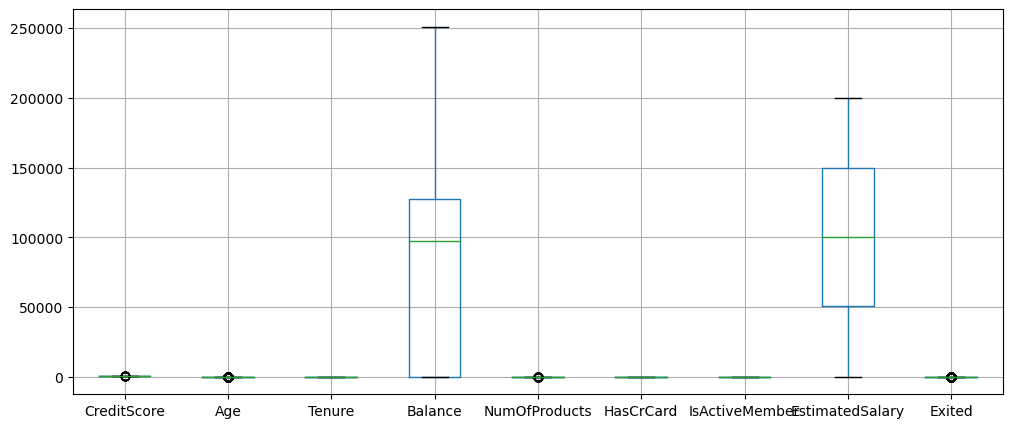

In [10]:
plt.figure(figsize=(12, 5))
data.boxplot()
plt.show()

In [11]:
#splitting data into target and features
x= data.iloc[: , :-1] #features
y=data.iloc[:, -1] #target

In [12]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [13]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

### Removing outliers

In [14]:
x.skew(numeric_only=None)

CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
dtype: float64

if skew < 0.5 => there are no outliers => normal distribution

we can notice that the variables "Age"  have many outliers 

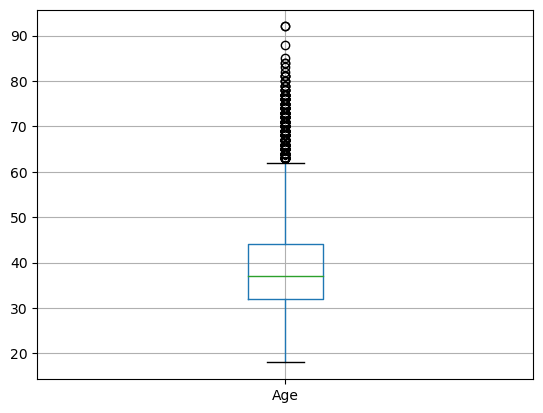

In [15]:
x.boxplot(column=['Age'], return_type='axes');

<AxesSubplot:xlabel='Age', ylabel='Density'>

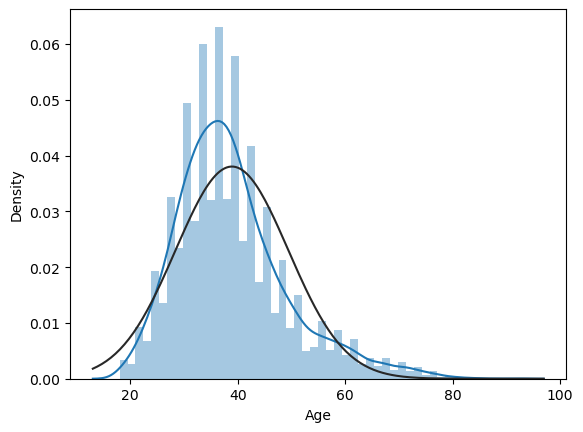

In [16]:
from scipy.stats import norm
sns.distplot(data.Age, fit = norm) 
#displays the plot of the dataset compared to the normal distribution

In [17]:
age_log = np.log(data.Age) #applying log function to the dataset

<AxesSubplot:xlabel='Age', ylabel='Density'>

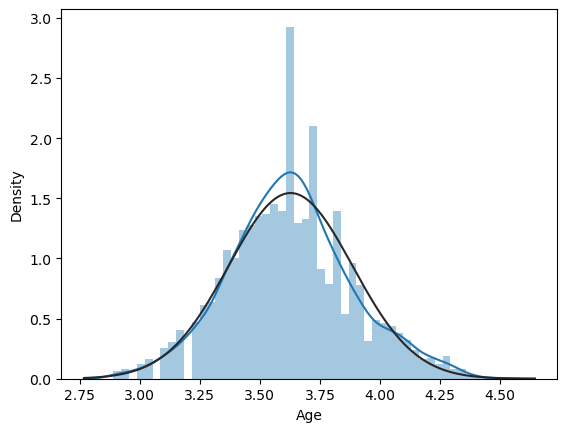

In [18]:
sns.distplot(age_log, fit = norm) 

### Converting categorical variables:

In [19]:
data.select_dtypes(exclude='number')

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female
...,...,...
9995,France,Male
9996,France,Male
9997,France,Female
9998,Germany,Male


#### Transform column : gender

In [20]:
ohe = OneHotEncoder() #initialize one hot encoder object
transformed = ohe.fit_transform(x[['Gender']]) #fit transform the feature "state"
#print(transformed.toarray())

In [21]:
print(ohe.categories_) #print categorical values of the features "state"

[array(['Female', 'Male'], dtype=object)]


In [22]:
x[ohe.categories_[0]] = transformed.toarray() 
#convert the transformed categorical variables into a numpy array and add them to the dataset x
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Female,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1.0,0.0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,1.0,0.0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1.0,0.0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,1.0,0.0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,1.0,0.0


#### Transform column Geography:

In [23]:
data.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [24]:
ohe1 = OneHotEncoder() #initialize one hot encoder object
transformed1 = ohe1.fit_transform(x[['Geography']]) #fit transform the feature "state"
#print(transformed1.toarray())

In [25]:
print(ohe1.categories_) #print categorical values of the features "state"

[array(['France', 'Germany', 'Spain'], dtype=object)]


In [26]:
x[ohe1.categories_[0]] = transformed1.toarray() 
#convert the transformed categorical variables into a numpy array and add them to the dataset x
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Female,Male,France,Germany,Spain
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1.0,0.0,1.0,0.0,0.0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,1.0,0.0,0.0,0.0,1.0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1.0,0.0,1.0,0.0,0.0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,1.0,0.0,1.0,0.0,0.0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,1.0,0.0,0.0,0.0,1.0


In [27]:
x = x.drop("Spain", axis=1)
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Female,Male,France,Germany
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1.0,0.0,1.0,0.0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,1.0,0.0,0.0,0.0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1.0,0.0,1.0,0.0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,1.0,0.0,1.0,0.0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,1.0,0.0,0.0,0.0


In [28]:
cols=["Geography", "Gender", "Male"]
x = x.drop(columns= cols, axis=1)
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Female,France,Germany
0,619,42,2,0.00,1,1,1,101348.88,1.0,1.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,1.0,0.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1.0,1.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,1.0,1.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,1.0,0.0,0.0


In [29]:
x.shape

(10000, 11)

In [99]:
#split the two datasets x and y into test and training sets
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)
#test_size = 0.2 : 80% training 20% testing

### Applying Standard Scaler

In [100]:
scaler = StandardScaler() #initialize the standard scaler object

cols=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'] #choose columns on which you want to apply scaling
X_train[cols]=scaler.fit_transform(X_train[cols]) #fit transform the columns chosen in the training set
X_test[cols]=scaler.transform(X_test[cols]) #fit transform the columns chosen in the testing set

In [101]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Female,France,Germany
7389,0.169582,-0.464608,0.006661,-1.215717,0.809503,1,0,1.106432,1.0,0.0,0.0
9275,-2.304559,0.301026,-1.377440,-0.006312,-0.921591,1,1,-0.748664,0.0,0.0,1.0
2995,-1.191196,-0.943129,-1.031415,0.579935,-0.921591,1,0,1.485335,1.0,1.0,0.0
5316,0.035566,0.109617,0.006661,0.473128,-0.921591,1,0,1.276528,0.0,0.0,0.0
356,2.056114,1.736588,1.044737,0.810193,0.809503,1,1,0.558378,1.0,0.0,0.0


In [102]:
X_train.shape

(8000, 11)

### Implementing our first Deep learning model :

In [34]:
model = Sequential()

**Sequential model:**

The sequential model allows us to specify a neural network : we can specify the input, output, number of neural layers, activation functions and more...

**Seuquential model vs Functional model:**

In sequential models, you can only <a color="blue">stack one layer after another</a>. While in functional models, you can connect a layer to literally any other layer : you can <a color="blue">define multiple input or output that share layers </a>.
Functional API is an alternative approach of creating more complex models.

**Testing with the sigmoid activation function**
* Input_shape : number of input features
* Dense: a neural network layer

![sigmoid-func](https://machinelearningmastery.com/wp-content/uploads/2021/08/sigmoid.png)

In [35]:
model.add(Dense(6, input_shape=(11,))) #units:6 =(sum(input variables+target variables)/2)
model.add(Activation('sigmoid'))

model.add(Dense(6))
model.add(Activation('sigmoid'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

**define the loss function, the optimizer or learning rate, and the metrics**

In [36]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

**Sigmoid is used for binary classification methods where we only have 2 classes**

define :

- **batch_size**(a number of samples processed before the model is updated)
- **verbose**(controls output :(0,1,2)
- **epochs**(the number of complete passes through the training dataset) 
- **validation_split**(The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch)

In [37]:
hist = model.fit(X_train, y_train, 
                batch_size= 10,
                epochs= 100, 
                verbose=2,
                validation_split= 0.2)
#we have 10000 => 8000 train + 1000 test => 0.2 validation 
# => 1600 of training set  => we have 6400 training set remaining  => 6400= 640/epoche

Epoch 1/100
640/640 - 3s - loss: 0.5588 - accuracy: 0.7202 - val_loss: 0.4868 - val_accuracy: 0.7969 - 3s/epoch - 5ms/step
Epoch 2/100
640/640 - 2s - loss: 0.4749 - accuracy: 0.7958 - val_loss: 0.4622 - val_accuracy: 0.7969 - 2s/epoch - 3ms/step
Epoch 3/100
640/640 - 1s - loss: 0.4503 - accuracy: 0.7958 - val_loss: 0.4439 - val_accuracy: 0.7969 - 1s/epoch - 2ms/step
Epoch 4/100
640/640 - 1s - loss: 0.4350 - accuracy: 0.7948 - val_loss: 0.4356 - val_accuracy: 0.7962 - 1s/epoch - 2ms/step
Epoch 5/100
640/640 - 1s - loss: 0.4279 - accuracy: 0.8011 - val_loss: 0.4318 - val_accuracy: 0.8062 - 1s/epoch - 2ms/step
Epoch 6/100
640/640 - 1s - loss: 0.4237 - accuracy: 0.8031 - val_loss: 0.4291 - val_accuracy: 0.8100 - 1s/epoch - 2ms/step
Epoch 7/100
640/640 - 1s - loss: 0.4206 - accuracy: 0.8058 - val_loss: 0.4264 - val_accuracy: 0.8112 - 1s/epoch - 2ms/step
Epoch 8/100
640/640 - 2s - loss: 0.4176 - accuracy: 0.8095 - val_loss: 0.4233 - val_accuracy: 0.8163 - 2s/epoch - 3ms/step
Epoch 9/100
640/

- **loss** = 0.3302
- **accuracy** = 0.8639
- **loss on validation samples** = 0.3534
- **accuracy on validation samples** = 0.8606

**val_loss> loss value : we should change activation function**

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 activation (Activation)     (None, 6)                 0         
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 activation_1 (Activation)   (None, 6)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
 activation_2 (Activation)   (None, 1)                 0         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable pa

dense : param = 11(input variables) *6 = 6(layer_0)*6(layer_1) +6(layer_1) =72

dense_1 : param = 6(layer_1)*6(layer_2) + 6(layer_2) =42


## Changing the activation function:

![relu-vs-sigmoid](https://blog.paperspace.com/content/images/2018/06/relu.png)

**ReLU : linear function that will output the input directly if it is positive, otherwise, it will output zero.**

In [39]:
model.add(Dense(6, input_shape=(11,))) #6 = (sum(input variables+target variables)/2)
model.add(Activation('relu'))

model.add(Dense(6))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [40]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

hist = model.fit(X_train, y_train, 
                batch_size= 10,
                epochs= 100, 
                verbose=2,
                validation_split= 0.2)

Epoch 1/100
640/640 - 2s - loss: 0.5609 - accuracy: 0.8491 - val_loss: 0.4430 - val_accuracy: 0.8581 - 2s/epoch - 3ms/step
Epoch 2/100
640/640 - 2s - loss: 0.3840 - accuracy: 0.8647 - val_loss: 0.3691 - val_accuracy: 0.8562 - 2s/epoch - 2ms/step
Epoch 3/100
640/640 - 2s - loss: 0.3495 - accuracy: 0.8652 - val_loss: 0.3591 - val_accuracy: 0.8625 - 2s/epoch - 2ms/step
Epoch 4/100
640/640 - 2s - loss: 0.3417 - accuracy: 0.8650 - val_loss: 0.3600 - val_accuracy: 0.8575 - 2s/epoch - 2ms/step
Epoch 5/100
640/640 - 2s - loss: 0.3396 - accuracy: 0.8625 - val_loss: 0.3572 - val_accuracy: 0.8612 - 2s/epoch - 2ms/step
Epoch 6/100
640/640 - 2s - loss: 0.3383 - accuracy: 0.8633 - val_loss: 0.3565 - val_accuracy: 0.8625 - 2s/epoch - 3ms/step
Epoch 7/100
640/640 - 2s - loss: 0.3367 - accuracy: 0.8637 - val_loss: 0.3600 - val_accuracy: 0.8531 - 2s/epoch - 2ms/step
Epoch 8/100
640/640 - 2s - loss: 0.3363 - accuracy: 0.8630 - val_loss: 0.3578 - val_accuracy: 0.8575 - 2s/epoch - 2ms/step
Epoch 9/100
640/

- **loss** = 0.3299
- **accuracy** = 0.8652
- **loss on validation samples** = 0.3541
- **accuracy on validation samples** = 0.8575

we can notice that the accuracy has increased from 86.39 to 86.52, but in the other hand, the accuracy on the validation samples has dropped from 86.06 to 85.75. There is something wrong with our model.

To solve this we can change some of the parameteres of the optimizer 

In [41]:
y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)

63/63 [==============================] - 0s 1ms/step


In [108]:
y_test = y_test.values

**Comparing y_test and y_pred**

In [43]:
for i in range(10):
    print(y_test[i], y_pred[i])

0 [False]
1 [False]
0 [False]
0 [False]
0 [False]
1 [ True]
0 [False]
0 [False]
1 [False]
1 [ True]


**Confusion Matrix**

In [44]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[1526,   69],
       [ 211,  194]])

<AxesSubplot:>

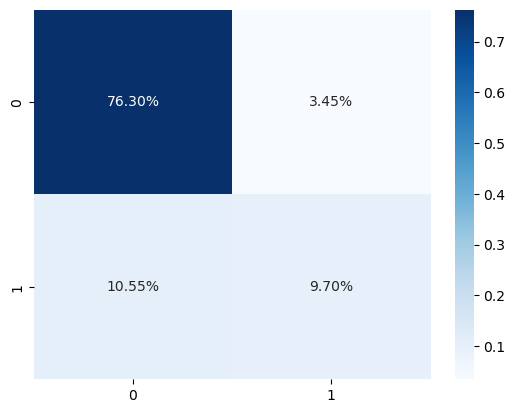

In [45]:
import seaborn as sns
sns.heatmap(conf_matrix/np.sum(conf_matrix), 
            annot=True, 
            fmt='.2%', 
            cmap='Blues')

### Changing parameters of Adam Optimizer

In [46]:
opt = keras.optimizers.legacy.Adam(learning_rate=0.003, decay=  0.0001)
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=opt)

In [47]:
hist = model.fit(X_train, y_train, 
                batch_size= 10,
                epochs= 100, 
                verbose=2,
                validation_split= 0.2)

Epoch 1/100
640/640 - 2s - loss: 0.3331 - accuracy: 0.8625 - val_loss: 0.3559 - val_accuracy: 0.8544 - 2s/epoch - 3ms/step
Epoch 2/100
640/640 - 2s - loss: 0.3346 - accuracy: 0.8628 - val_loss: 0.3581 - val_accuracy: 0.8569 - 2s/epoch - 3ms/step
Epoch 3/100
640/640 - 2s - loss: 0.3333 - accuracy: 0.8633 - val_loss: 0.3548 - val_accuracy: 0.8556 - 2s/epoch - 2ms/step
Epoch 4/100
640/640 - 2s - loss: 0.3333 - accuracy: 0.8619 - val_loss: 0.3523 - val_accuracy: 0.8587 - 2s/epoch - 2ms/step
Epoch 5/100
640/640 - 2s - loss: 0.3325 - accuracy: 0.8631 - val_loss: 0.3588 - val_accuracy: 0.8600 - 2s/epoch - 2ms/step
Epoch 6/100
640/640 - 2s - loss: 0.3327 - accuracy: 0.8644 - val_loss: 0.3566 - val_accuracy: 0.8556 - 2s/epoch - 2ms/step
Epoch 7/100
640/640 - 2s - loss: 0.3322 - accuracy: 0.8650 - val_loss: 0.3524 - val_accuracy: 0.8600 - 2s/epoch - 3ms/step
Epoch 8/100
640/640 - 2s - loss: 0.3322 - accuracy: 0.8606 - val_loss: 0.3544 - val_accuracy: 0.8606 - 2s/epoch - 2ms/step
Epoch 9/100
640/

- **loss** = 0.3272 
- **accuracy** = 0.8675
- **loss on validation samples** = 0.3515
- **accuracy on validation samples** = 0.8594

we can see that the loss has dropped a bit for both the training and validation splits and the accuracy has increased a bit

**Create a model :**

In [48]:
def create_model():
    model=Sequential()
    model.add(Dense(6, input_shape=(11,))) #6 = (sum(input variables+target variables)/2)
    model.add(Activation('relu'))

    model.add(Dense(6))
    model.add(Activation('relu'))

    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    
    opt = keras.optimizers.legacy.Adam(learning_rate=0.003, decay=  0.0001)
    model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=opt)
    
    return model

In [49]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

In [50]:
from keras.wrappers.scikit_learn import KerasClassifier

model = KerasClassifier(build_fn=create_model) 

parameters = {'batch_size':[10,20],
              'epochs':[100,120]}
random_search = RandomizedSearchCV(estimator = model, 
                           param_distributions = parameters, 
                           scoring='accuracy',
                           cv=10)

In [51]:
#random= random_search.fit(X_train, y_train)
#best_parameters = random.best_params_
#best_accuracy = random.best_score_

In [52]:
"""model = KerasClassifier(build_fn=create_model, batch_size=10, epochs =100)
accuracies= cross_val_score(estimator = model , X= X_train, y = y_train, cv=10)
mean =accuracies.mean()
std =accuracies.std()
"""

'model = KerasClassifier(build_fn=create_model, batch_size=10, epochs =100)\naccuracies= cross_val_score(estimator = model , X= X_train, y = y_train, cv=10)\nmean =accuracies.mean()\nstd =accuracies.std()\n'

**(gridsearchCV took too long to execute)**

**Trying different epochs and learning rate values :**

In [54]:
hist = model.fit(X_train, y_train, 
                batch_size= 10,
                epochs= 120, 
                verbose=2,
                validation_split= 0.2)

Epoch 1/120
640/640 - 2s - loss: 0.4464 - accuracy: 0.8116 - val_loss: 0.4142 - val_accuracy: 0.8281 - 2s/epoch - 3ms/step
Epoch 2/120
640/640 - 1s - loss: 0.3890 - accuracy: 0.8378 - val_loss: 0.3890 - val_accuracy: 0.8363 - 1s/epoch - 2ms/step
Epoch 3/120
640/640 - 1s - loss: 0.3642 - accuracy: 0.8495 - val_loss: 0.3741 - val_accuracy: 0.8438 - 1s/epoch - 2ms/step
Epoch 4/120
640/640 - 1s - loss: 0.3538 - accuracy: 0.8533 - val_loss: 0.3644 - val_accuracy: 0.8481 - 1s/epoch - 2ms/step
Epoch 5/120
640/640 - 2s - loss: 0.3484 - accuracy: 0.8587 - val_loss: 0.3602 - val_accuracy: 0.8512 - 2s/epoch - 3ms/step
Epoch 6/120
640/640 - 1s - loss: 0.3461 - accuracy: 0.8561 - val_loss: 0.3598 - val_accuracy: 0.8481 - 1s/epoch - 2ms/step
Epoch 7/120
640/640 - 1s - loss: 0.3436 - accuracy: 0.8586 - val_loss: 0.3592 - val_accuracy: 0.8500 - 1s/epoch - 2ms/step
Epoch 8/120
640/640 - 1s - loss: 0.3429 - accuracy: 0.8586 - val_loss: 0.3571 - val_accuracy: 0.8544 - 1s/epoch - 2ms/step
Epoch 9/120
640/

In [55]:
def create_model2():
    model=Sequential()
    model.add(Dense(6, input_shape=(11,))) #6 = (sum(input variables+target variables)/2)
    model.add(Activation('relu'))

    model.add(Dense(6))
    model.add(Activation('relu'))

    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    
    opt = keras.optimizers.legacy.Adam(learning_rate=0.001, decay=  0.1)
    model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=opt)
    
    return model

In [56]:
model2 = KerasClassifier(build_fn=create_model2) 

In [57]:
hist2 = model2.fit(X_train, y_train, 
                batch_size= 10,
                epochs= 100, 
                verbose=2,
                validation_split= 0.2)

Epoch 1/100
640/640 - 2s - loss: 0.6201 - accuracy: 0.7602 - val_loss: 0.6040 - val_accuracy: 0.7962 - 2s/epoch - 3ms/step
Epoch 2/100
640/640 - 1s - loss: 0.5979 - accuracy: 0.7955 - val_loss: 0.5935 - val_accuracy: 0.7969 - 1s/epoch - 2ms/step
Epoch 3/100
640/640 - 1s - loss: 0.5899 - accuracy: 0.7956 - val_loss: 0.5875 - val_accuracy: 0.7969 - 1s/epoch - 2ms/step
Epoch 4/100
640/640 - 2s - loss: 0.5848 - accuracy: 0.7958 - val_loss: 0.5833 - val_accuracy: 0.7969 - 2s/epoch - 2ms/step
Epoch 5/100
640/640 - 1s - loss: 0.5810 - accuracy: 0.7958 - val_loss: 0.5801 - val_accuracy: 0.7969 - 1s/epoch - 2ms/step
Epoch 6/100
640/640 - 1s - loss: 0.5781 - accuracy: 0.7958 - val_loss: 0.5775 - val_accuracy: 0.7969 - 1s/epoch - 2ms/step
Epoch 7/100
640/640 - 1s - loss: 0.5757 - accuracy: 0.7958 - val_loss: 0.5753 - val_accuracy: 0.7969 - 1s/epoch - 2ms/step
Epoch 8/100
640/640 - 1s - loss: 0.5736 - accuracy: 0.7958 - val_loss: 0.5734 - val_accuracy: 0.7969 - 1s/epoch - 2ms/step
Epoch 9/100
640/

**changing the learning rate and decay decreased the model's accuracy and increased the loss alot**

### Adding a dropout layer :

In [58]:
def create_model():
    model=Sequential()
    model.add(Dense(6, input_shape=(11,))) #6 = (sum(input variables+target variables)/2)
    model.add(Activation('relu'))
    model.add(Dropout(0.3))

    model.add(Dense(6))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))

    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    
    opt = keras.optimizers.legacy.Adam(learning_rate=0.003, decay=  0.0001)
    model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=opt)
    
    return model

**Dropout layer with a dropout rate of 0.3, which means that 30% of the input units will be randomly dropped out during training.**

In [59]:
model = KerasClassifier(build_fn=create_model) 

In [60]:
hist = model.fit(X_train, y_train, 
                batch_size= 10,
                epochs= 100, 
                verbose=2,
                validation_split= 0.2)

Epoch 1/100
640/640 - 2s - loss: 0.5015 - accuracy: 0.7894 - val_loss: 0.4506 - val_accuracy: 0.7969 - 2s/epoch - 3ms/step
Epoch 2/100
640/640 - 1s - loss: 0.4619 - accuracy: 0.7995 - val_loss: 0.4268 - val_accuracy: 0.8087 - 1s/epoch - 2ms/step
Epoch 3/100
640/640 - 1s - loss: 0.4442 - accuracy: 0.8075 - val_loss: 0.4081 - val_accuracy: 0.8125 - 1s/epoch - 2ms/step
Epoch 4/100
640/640 - 1s - loss: 0.4363 - accuracy: 0.8077 - val_loss: 0.4005 - val_accuracy: 0.8181 - 1s/epoch - 2ms/step
Epoch 5/100
640/640 - 2s - loss: 0.4334 - accuracy: 0.8081 - val_loss: 0.3984 - val_accuracy: 0.8150 - 2s/epoch - 3ms/step
Epoch 6/100
640/640 - 1s - loss: 0.4270 - accuracy: 0.8087 - val_loss: 0.3945 - val_accuracy: 0.8175 - 1s/epoch - 2ms/step
Epoch 7/100
640/640 - 2s - loss: 0.4339 - accuracy: 0.8077 - val_loss: 0.3909 - val_accuracy: 0.8175 - 2s/epoch - 2ms/step
Epoch 8/100
640/640 - 1s - loss: 0.4202 - accuracy: 0.8091 - val_loss: 0.3898 - val_accuracy: 0.8156 - 1s/epoch - 2ms/step
Epoch 9/100
640/

**In this case I'm going to stick with the original model since the accuracy is 86%**

In [63]:
def create_model():
    model=Sequential()
    model.add(Dense(6, input_shape=(11,))) #6 = (sum(input variables+target variables)/2)
    model.add(Activation('relu'))

    model.add(Dense(6))
    model.add(Activation('relu'))

    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    
    opt = keras.optimizers.legacy.Adam(learning_rate=0.003, decay=  0.0001)
    model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=opt)
    
    return model


model = KerasClassifier(build_fn=create_model) 

In [64]:
hist = model.fit(X_train, y_train, 
                batch_size= 10,
                epochs= 100, 
                verbose=2,
                validation_split= 0.2)

Epoch 1/100
640/640 - 2s - loss: 0.4446 - accuracy: 0.8094 - val_loss: 0.4114 - val_accuracy: 0.8056 - 2s/epoch - 3ms/step
Epoch 2/100
640/640 - 1s - loss: 0.3896 - accuracy: 0.8184 - val_loss: 0.3842 - val_accuracy: 0.8275 - 1s/epoch - 2ms/step
Epoch 3/100
640/640 - 1s - loss: 0.3715 - accuracy: 0.8327 - val_loss: 0.3773 - val_accuracy: 0.8425 - 1s/epoch - 2ms/step
Epoch 4/100
640/640 - 1s - loss: 0.3645 - accuracy: 0.8383 - val_loss: 0.3783 - val_accuracy: 0.8400 - 1s/epoch - 2ms/step
Epoch 5/100
640/640 - 2s - loss: 0.3608 - accuracy: 0.8417 - val_loss: 0.3741 - val_accuracy: 0.8487 - 2s/epoch - 2ms/step
Epoch 6/100
640/640 - 1s - loss: 0.3556 - accuracy: 0.8498 - val_loss: 0.3711 - val_accuracy: 0.8537 - 1s/epoch - 2ms/step
Epoch 7/100
640/640 - 1s - loss: 0.3514 - accuracy: 0.8558 - val_loss: 0.3670 - val_accuracy: 0.8556 - 1s/epoch - 2ms/step
Epoch 8/100
640/640 - 1s - loss: 0.3475 - accuracy: 0.8595 - val_loss: 0.3634 - val_accuracy: 0.8587 - 1s/epoch - 2ms/step
Epoch 9/100
640/

- **loss:** 0.3266 
- **accuracy:** 0.8681 
- **val_loss:** 0.3484 
- **val_accuracy:** 0.8569 

### identify correct and incorrect indices:

In [121]:
y_pred = model.predict(X_test)

63/63 [==============================] - 0s 1ms/step


In [122]:
correct_indices = np.where(y_pred == y_test)[1]
incorrect_indices = np.where(y_pred != y_test)[1]

In [123]:
for i in range(10):
    print(y_pred[i], y_test[i])

[0] 0
[0] 1
[0] 0
[0] 0
[0] 0
[1] 1
[0] 0
[0] 0
[0] 1
[1] 1


In [124]:
correct_indices

array([   0,    2,    3, ..., 1997, 1998, 1999])

In [125]:
incorrect_indices

array([   1,    5,    8, ..., 1968, 1981, 1989])

### Plotting correct and incorrect indices:

In [139]:
"""
classes_to_plot=[0, 1, 2, 3, 4, 5, 6, 7, 8]
assert len(set(classes_to_plot)) == 9, "classes_to_plot must contain exactly 9 unique classes."


filtered_correct_indices = np.array([i for i in correct_indices if y_test[i] in classes_to_plot])
assert np.all(np.in1d(filtered_correct_indices, np.arange(len(y_pred))) == True)

y_pred_filtered = y_pred[filtered_correct_indices]
y_test_filtered = y_test[filtered_correct_indices]


# Create the scatter plot
plt.scatter(y_test_filtered, y_pred_filtered)
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
plt.title("Scatter plot of True vs. Predicted Labels for 9 classes")
plt.show()
"""

'\nclasses_to_plot=[0, 1, 2, 3, 4, 5, 6, 7, 8]\nassert len(set(classes_to_plot)) == 9, "classes_to_plot must contain exactly 9 unique classes."\n\n\nfiltered_correct_indices = np.array([i for i in correct_indices if y_test[i] in classes_to_plot])\nassert np.all(np.in1d(filtered_correct_indices, np.arange(len(y_pred))) == True)\n\ny_pred_filtered = y_pred[filtered_correct_indices]\ny_test_filtered = y_test[filtered_correct_indices]\n\n\n# Create the scatter plot\nplt.scatter(y_test_filtered, y_pred_filtered)\nplt.xlabel("True Labels")\nplt.ylabel("Predicted Labels")\nplt.title("Scatter plot of True vs. Predicted Labels for 9 classes")\nplt.show()\n'